In [ ]:
#H05T01
#lämpötilan mittausdataa

In [2]:
#datan esikäsittely
import pandas as pd

url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv'
df = pd.read_csv(url, sep=',', decimal='.')

#splitataan aikasarake
aikasplit = df['Unnamed: 0'].str.split(' ')
df['paiva'] = aikasplit.str[0].str.split('-').str[2].astype(int)
df['tunti'] = aikasplit.str[1].str.split(':').str[0].astype(int)
df['minuutti'] = aikasplit.str[1].str.split(':').str[1].astype(int)
df['sekunti'] = aikasplit.str[1].str.split(':').str[2].astype(int)

#aikaleima sekunteina
df['aika_s'] = df['sekunti'] + df['minuutti']*60 + df['tunti']*3600 + df['paiva']*86400

#aikaa on kulunut mittaussarjan alusta
df['aika, s'] = df['aika_s'] - df.loc[0,'aika_s']

#tehdään uusi df
df2 = df[['aika, s','Air temperature, degC']].copy()

df2.head(5)

,"aika, s","Air temperature, degC"
0,0,6.5
1,600,6.2
2,1200,5.7
3,1800,5.7
4,2400,5.7


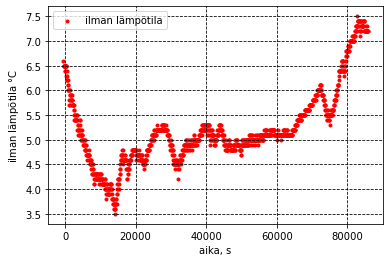

In [3]:
#sitten tehdään kuvaaja
import matplotlib.pyplot as plt

plt.scatter(df2['aika, s'],df2['Air temperature, degC'], color='red', marker='.')
plt.xlabel('aika, s')
plt.ylabel('ilman lämpötila, $\degree$C' )
plt.legend(['ilman lämpötila'])
plt.grid(color='black', linestyle='--')
plt.show()